## Dataset Analysis

In [9]:
import mne

file_path = "./sub-001/eeg/sub-001_task-eyesclosed_eeg.set"
raw = mne.io.read_raw_eeglab(file_path, preload=True)

# Display EEG metadata
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>


In [31]:
# Plot EEG signals
# raw.plot(n_channels=19, scalings='auto', title="Raw EEG Data")

In [4]:
import matplotlib.pyplot as plt
import mne
import warnings
import pandas as pd
import seaborn as sns


# Ignore RuntimeWarning
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [19]:
file_path_raw = 'sub-001/eeg/sub-001_task-eyesclosed_eeg.set'
file_path0 = 'derivatives/sub-001/eeg/sub-001_task-eyesclosed_eeg.set'
file_path1 = 'intermediate-data/train/sub-001_eeg.set'
file_path2 = 'model-data/train/sub-001_eeg_chunk_1.set'
raw_data = mne.io.read_raw_eeglab(file_path_raw)
deriv_data = mne.io.read_raw_eeglab(file_path0)
intrm_data = mne.io.read_raw_eeglab(file_path1)
chunk_data = mne.io.read_raw_eeglab(file_path2)

In [27]:
print(raw_data)
print(raw_data.info)
raw_data

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MiB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>


<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MiB, data loaded>

In [28]:
print(deriv_data)
print(deriv_data.info)
deriv_data

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MiB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>


<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MiB, data loaded>

In [29]:
print(intrm_data)
print(intrm_data.info)
intrm_data

<RawEEGLAB | sub-001_eeg.set, 19 x 299900 (599.8 s), ~43.5 MiB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>


<RawEEGLAB | sub-001_eeg.set, 19 x 299900 (599.8 s), ~43.5 MiB, data loaded>

In [30]:
print(chunk_data)
print(chunk_data.info)
chunk_data

<RawEEGLAB | sub-001_eeg_chunk_1.set, 19 x 1425 (15.0 s), ~238 KiB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 47.5 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 95.0 Hz
>


<RawEEGLAB | sub-001_eeg_chunk_1.set, 19 x 1425 (15.0 s), ~238 KiB, data loaded>

In [34]:
# print(raw_data.info, deriv_data.info, intrm_data.info, chunk_data.info)

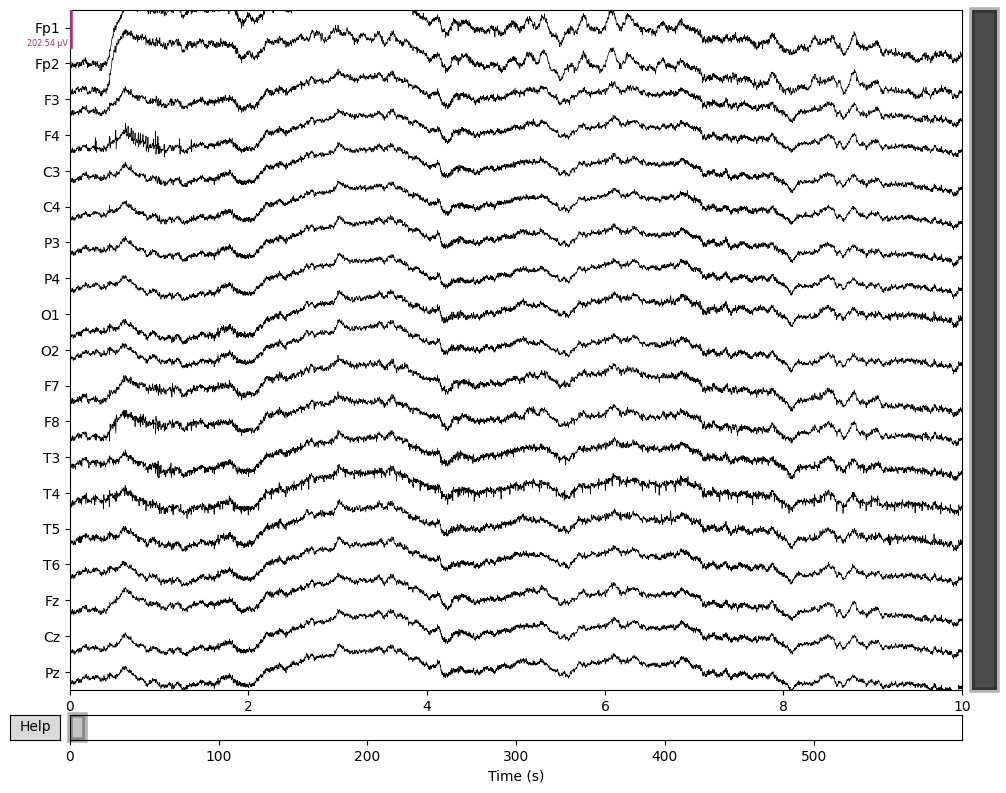

In [41]:
fig1 = raw_data.plot(n_channels=19, scalings='auto', title='Raw EEG Data')

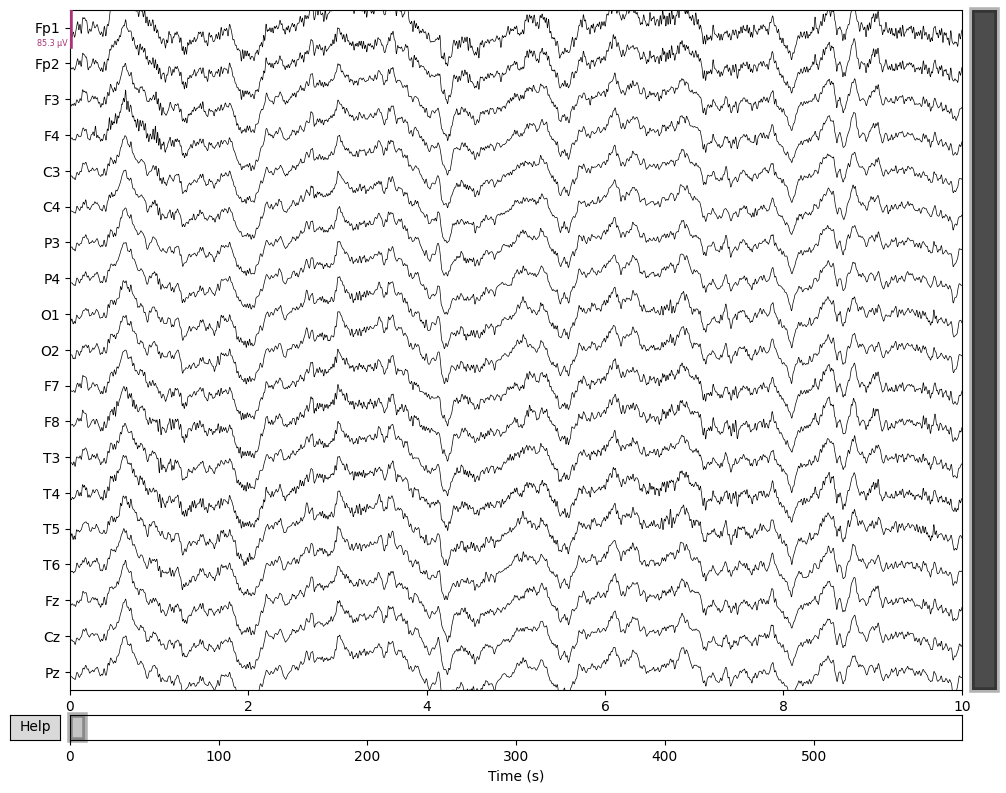

In [43]:
fig2 = intrm_data.plot(n_channels=19, scalings='auto', title='Intermediate EEG Data')

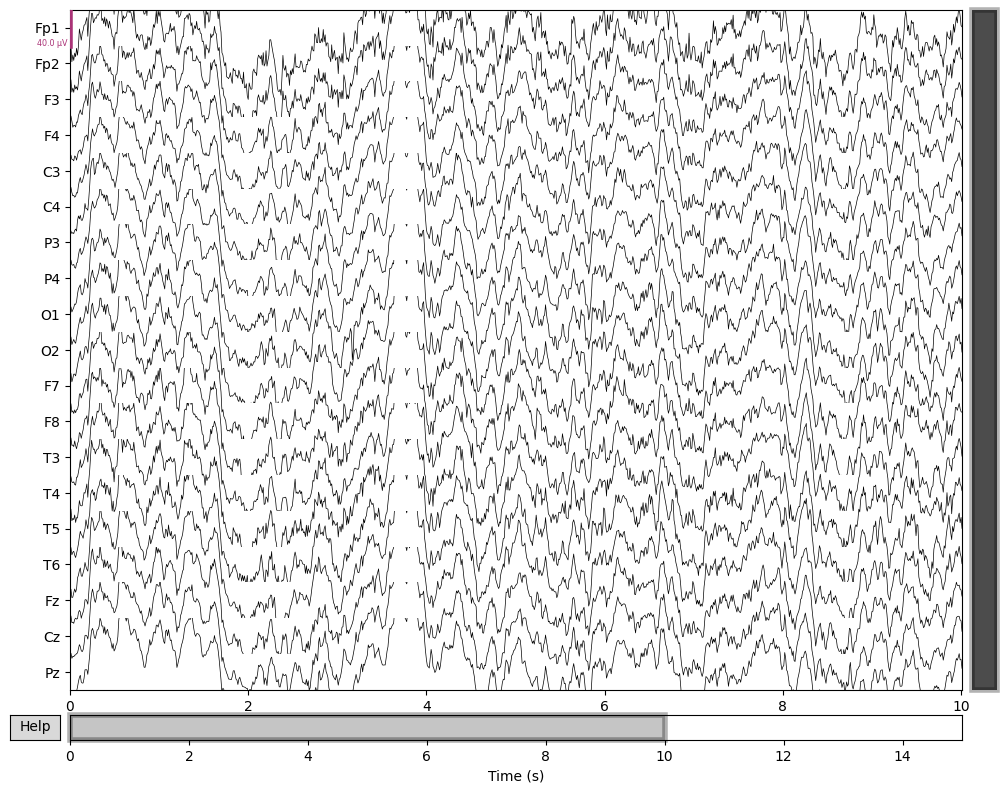

In [51]:
# Plot the chunk
fig3 = chunk_data.plot(title='Chunked EEG Segment')

In [53]:
print(len(raw_data), len(deriv_data), len(intrm_data), len(chunk_data))
print(raw_data.info['sfreq'], deriv_data.info['sfreq'], intrm_data.info['sfreq'], chunk_data.info['sfreq'])


299900 299900 299900 1425
500.0 500.0 500.0 95.0


In [56]:
print(raw_data.get_data().shape)
raw3 = raw_data.resample(95)
print(raw3.get_data().shape)
print(chunk_data.get_data().shape)

(19, 56981)
Sampling frequency of the instance is already 95.0, returning unmodified.
(19, 56981)
(19, 1425)


### Power Spectral Density (PSD)
PSD tells you how the power of a signal is distributed across different frequencies. For EEG data, this helps analyze brain activity in frequency bands like Delta, Theta, Alpha, Beta, etc.

Effective window size : 21.558 (s)
Plotting power spectral density (dB=True).
Effective window size : 4.096 (s)


/Users/hwangjeongho/Desktop/EEG Transformer/venv/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Plotting power spectral density (dB=True).
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/Users/hwangjeongho/Desktop/EEG Transformer/venv/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
/Users/hwangjeongho/Desktop/EEG Transformer/venv/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Effective window size : 15.000 (s)
Plotting power spectral density (dB=True).


/Users/hwangjeongho/Desktop/EEG Transformer/venv/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


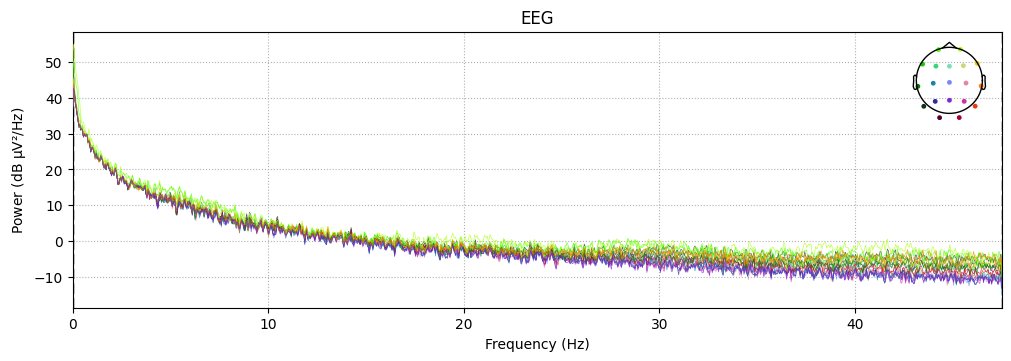

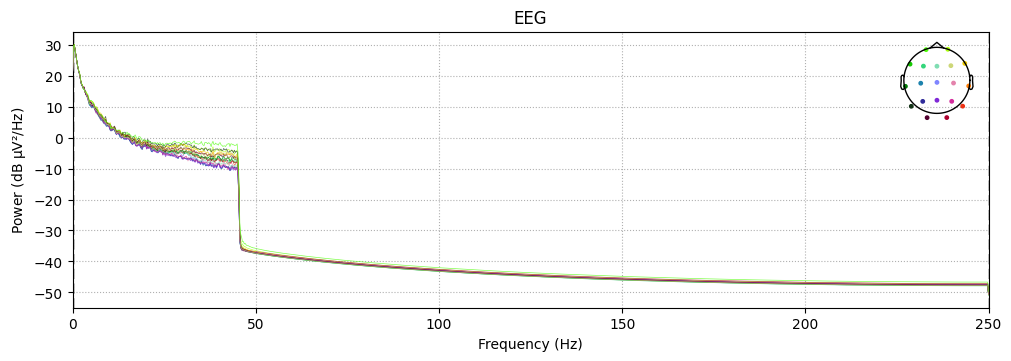

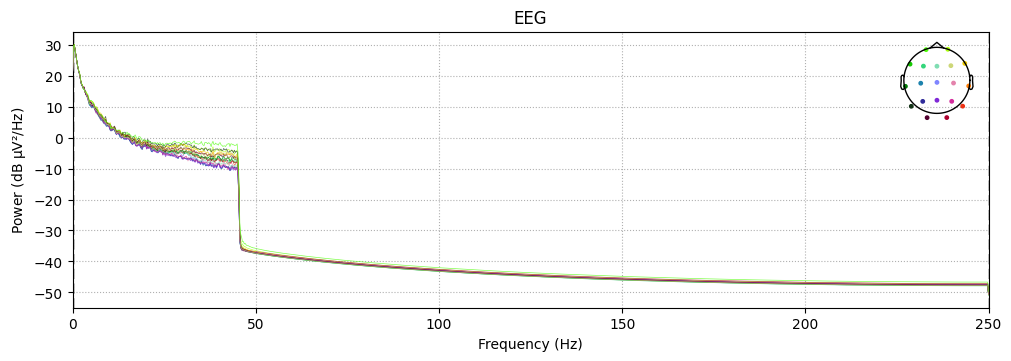

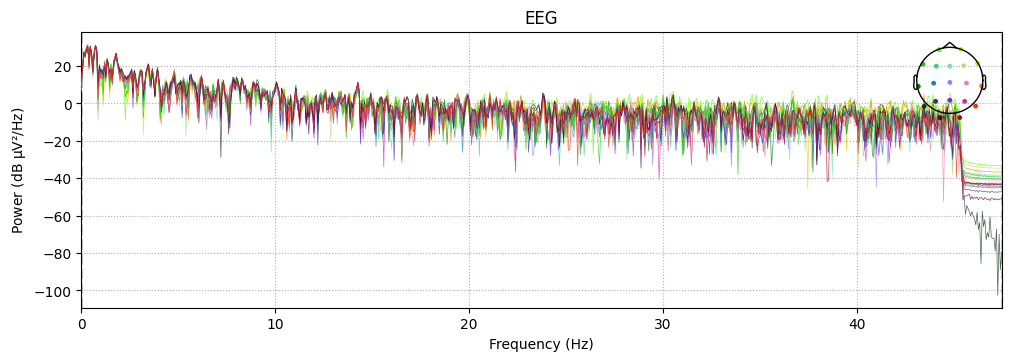

In [57]:
raw_data.compute_psd().plot().savefig('data-imgs/raw_data_original_psd.png')
deriv_data.compute_psd().plot().savefig('data-imgs/deriva_data_psd.png')
intrm_data.compute_psd().plot().savefig('data-imgs/intrm_data_psd.png')
chunk_data.compute_psd().plot().savefig('data-imgs/chunk_data_psd.png')

### Topographic Map
 This visualizes the positions of the EEG electrodes on a 2D head outline based on the montage (electrode cap layout).
 - Each dot on the topomap is an EEG electrode.

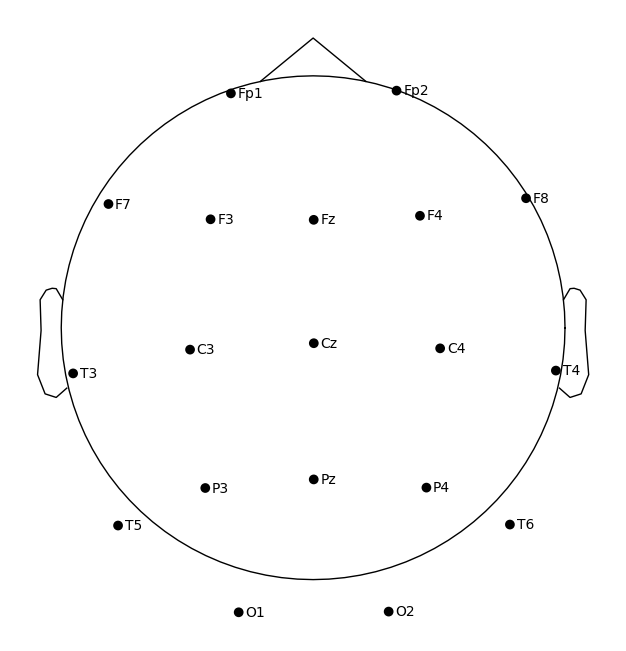

In [60]:
raw_data.plot_sensors(title = 'topomap', show_names = True).savefig('data-imgs/raw_data-head-map.png')
# deriv_data.plot_sensors(title = 'topomap', show_names = True).savefig('data-imgs/deriv_data-head-map.png')
# intrm_data.plot_sensors(title = 'topomap', show_names = True).savefig('data-imgs/intrm_data-head-map.png')
# chunk_data.plot_sensors(title = 'topomap', show_names = True).savefig('data-imgs/chunk_data-head-map.png')

1. raw_data.compute_psd()
→ This computes the Power Spectral Density (PSD) of the EEG signals — a way of measuring how much power (or energy) exists at different frequencies (e.g., Delta, Theta, Alpha, Beta, Gamma waves).

2. .plot_topomap()
→ This takes that frequency-based power information and plots a topographic map (aka topomap) to visualize where on the scalp that power is strongest/weakest.

### Interpreting Topomap
- In the topomap, the red areas indicate high power in that band, and white/light areas show low power.


Effective window size : 21.558 (s)


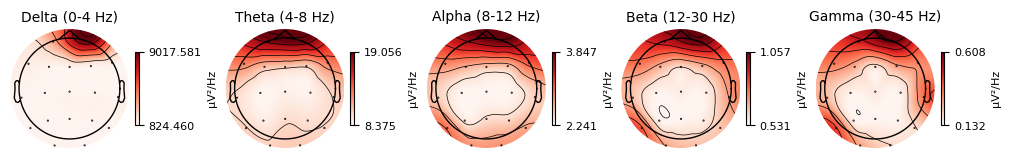

In [66]:
raw_data.compute_psd().plot_topomap().savefig('data-imgs/raw_data_sample_topomap.png')

Effective window size : 4.096 (s)


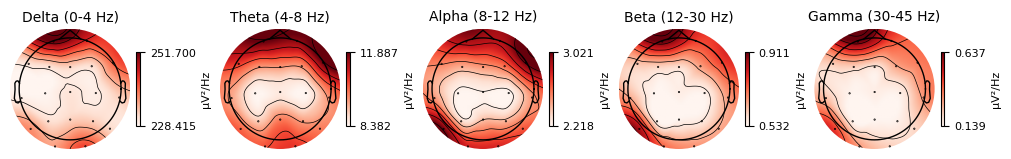

In [65]:
deriv_data.compute_psd().plot_topomap().savefig('data-imgs/deriv_data_sample_topomap.png')

Effective window size : 4.096 (s)


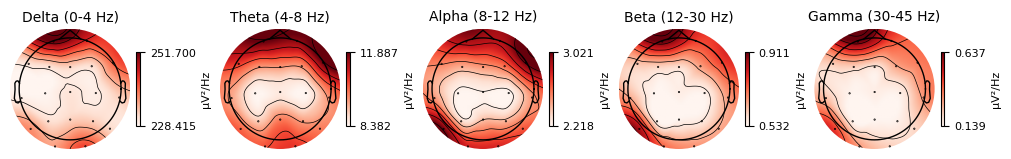

In [67]:
intrm_data.compute_psd().plot_topomap().savefig('data-imgs/intrm_data_sample_topomap.png')

Effective window size : 15.000 (s)


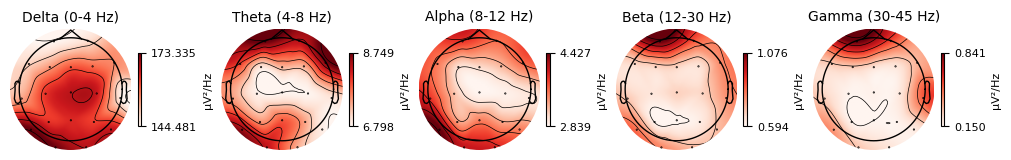

In [68]:
chunk_data.compute_psd().plot_topomap().savefig('data-imgs/chunk_data_sample_topomap.png')

In [ ]:
# --------------------------------------------------------------
# Scalp PSD Heatmaps across Frequency Bands (AD / FTD / CN)
# --------------------------------------------------------------

import os
import json
import numpy as np
import mne
import matplotlib.pyplot as plt
from pathlib import Path

# ==== File Paths ====
ROOT_DIR     = Path("/Users/hwangjeongho/Desktop/EEG Transformer")
DERIV_DIR    = ROOT_DIR / "derivatives"
LABEL_FILE   = ROOT_DIR / "intermediate-data" / "labels.json"
OUTPUT_FIG   = ROOT_DIR / "data-imgs" / "group_bandwise_psd_topomap.png"

# ==== Frequency Bands ====
BANDS = {
    "delta": (0.5, 4),
    "theta": (4, 8),
    "alpha": (8, 13),
    "beta":  (13, 25),
    "gamma": (25, 45)
}

# ==== Group Label Mapping ====
GROUP_MAP = {"A": "AD", "F": "FTD", "C": "CN"}

# ==== EEG Montage ====
montage = mne.channels.make_standard_montage("standard_1020")

# ==== Initialize PSD Accumulators ====
band_sum   = {g: {b: 0 for b in BANDS} for g in GROUP_MAP.values()}
band_count = {g: 0 for g in GROUP_MAP.values()}

# ==== Load Subject Metadata ====
with open(LABEL_FILE) as f:
    entries = json.load(f)

info_template = None  # To store Raw.info from the first subject

# ==== Iterate over all subjects ====
for subj_id, entry in entries.items():
    group_label = GROUP_MAP[entry["Group"]]
    eeg_file    = DERIV_DIR / subj_id / "eeg" / f"{subj_id}_task-eyesclosed_eeg.set"

    if not eeg_file.exists():
        continue

    raw = mne.io.read_raw_eeglab(eeg_file, preload=True, verbose="ERROR")
    raw.pick("eeg")
    raw.set_montage(montage)

    if raw.info["sfreq"] > 95:
        raw.resample(95)

    psd = raw.compute_psd(fmin=0.5, fmax=45, method="welch", n_fft=1024, n_overlap=512, verbose="ERROR")
    psds = psd.get_data()
    freqs = psd.freqs

    if info_template is None:
        info_template = raw.info.copy()

    for band, (fmin, fmax) in BANDS.items():
        idx = np.logical_and(freqs >= fmin, freqs < fmax)
        band_power = psds[:, idx].mean(axis=1)
        band_sum[group_label][band] += band_power
    band_count[group_label] += 1

# ==== Average PSDs ====
group_avg = {
    g: {
        b: band_sum[g][b] / band_count[g]
        for b in BANDS
    }
    for g in GROUP_MAP.values()
}

# ==== Band-wise vmin/vmax Normalization ====
vlim_per_band = {
    band: (
        min(group_avg[g][band].min() for g in GROUP_MAP.values()),
        max(group_avg[g][band].max() for g in GROUP_MAP.values())
    )
    for band in BANDS
}

# ==== Plotting ====
fig, axes = plt.subplots(len(GROUP_MAP), len(BANDS), figsize=(15, 8))
fig.suptitle("Scalp PSD Topomaps by Group and Frequency Band", fontsize=16)

for row_idx, group in enumerate(["AD", "FTD", "CN"]):
    for col_idx, band in enumerate(BANDS):
        ax = axes[row_idx, col_idx]
        data = group_avg[group][band]
        vmin, vmax = vlim_per_band[band]
        im, _ = mne.viz.plot_topomap(
            data, info_template,
            axes=ax, cmap="Reds",
            vlim=(vmin, vmax),
            show=False,
            contours=6,
            sensors=False
        )
        if row_idx == 0:
            ax.set_title(band.capitalize(), fontsize=11)
        if col_idx == 0:
            ax.set_ylabel(group, fontsize=12)

# ==== Shared Colorbar ====
cb_ax = fig.add_axes([0.3, 0.05, 0.4, 0.03])
fig.colorbar(im, cax=cb_ax, orientation="horizontal", label="Power Spectral Density (μV²/Hz)")

# ==== Save Figure ====
os.makedirs(OUTPUT_FIG.parent, exist_ok=True)
fig.tight_layout(rect=[0, 0.1, 1, 0.95])
fig.savefig(OUTPUT_FIG, dpi=300)
plt.close()

print(f"Topomap saved to: {OUTPUT_FIG}")


KeyError: 'participant_id'

### tsv file Analysis

In [69]:
tsv_path = 'model-data/participants.tsv'
participants = pd.read_csv(tsv_path, sep='\t')

In [70]:
participants

,participant_id,Gender,Age,Group,MMSE
0,sub-001,F,57,A,16
1,sub-002,F,78,A,22
2,sub-003,M,70,A,14
3,sub-004,F,67,A,20
4,sub-005,M,70,A,22
...,...,...,...,...,...
83,sub-084,F,71,F,24
84,sub-085,M,64,F,26
85,sub-086,M,49,F,26
86,sub-087,M,73,F,24


### Age Distribution

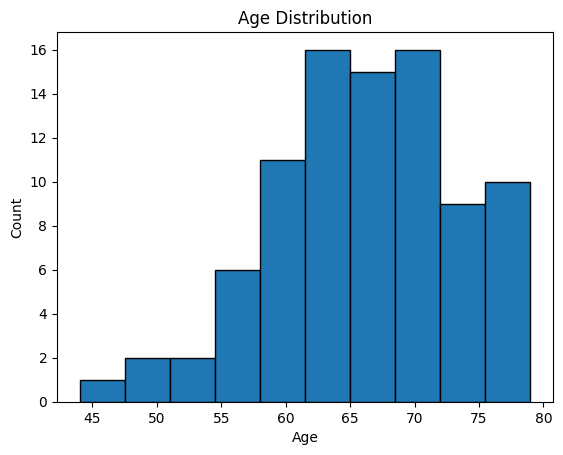

In [71]:
# Plot Age distribution in bins of 5
participants['Age'].hist(bins=10, edgecolor='black', grid=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('data-imgs/age_hist.png')

### Group (A, C, F) Distribution

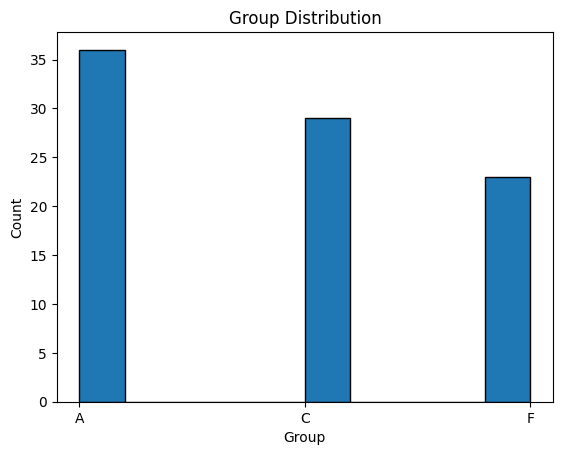

In [74]:
# Add Group distribution to the histogram along with Age
participants['Group'].hist(edgecolor='black', grid=False)
plt.title('Group Distribution')
plt.xlabel('Group')
plt.ylabel('Count')
plt.savefig('data-imgs/group_hist.png')

### Age vs Group
- The line inside the box shows the median age
- Interquartile range(IQR): 25th to 75th percentile
- Whiskers: typical min/max values
- Outliers: Plotted as dots

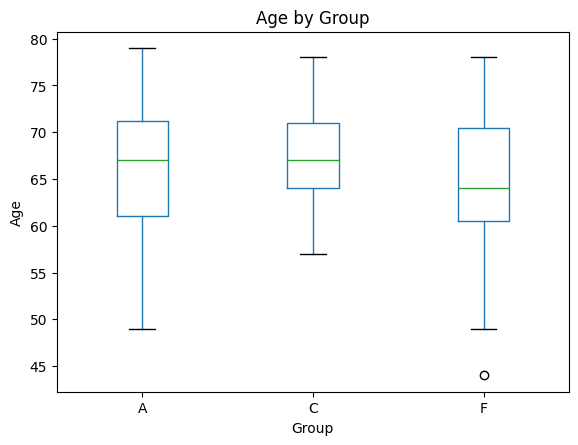

In [75]:
# Plot group by age
participants.boxplot(column='Age', by='Group', grid=False)
plt.title('Age by Group')
plt.suptitle('')
plt.xlabel('Group')
plt.ylabel('Age')
plt.savefig('data-imgs/age_by_group.png')

### Age by Gender

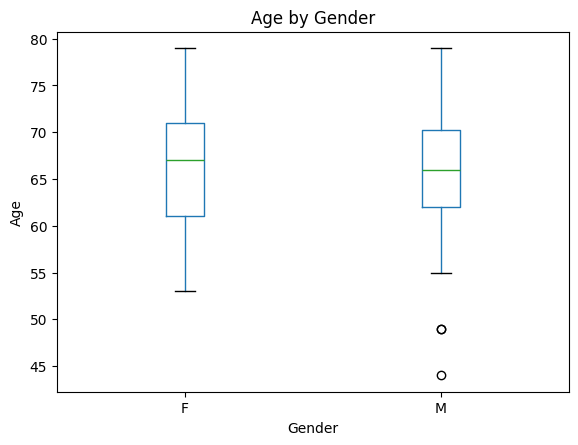

In [76]:
# Plot group by age
participants.boxplot(column='Age', by='Gender', grid=False)
plt.title('Age by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.savefig('data-imgs/age_by_gender.png')

### Group Distribution by Gender

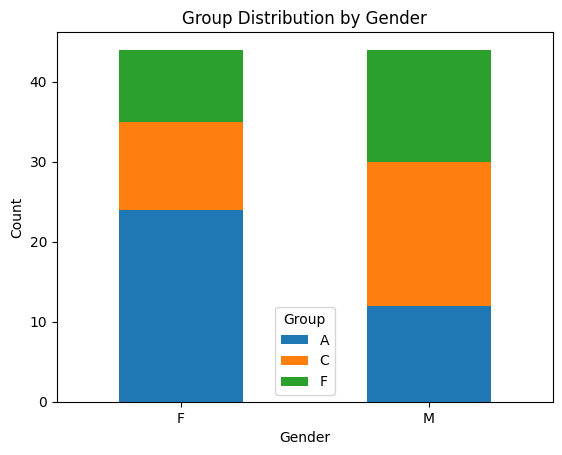

In [77]:
group_counts = participants.groupby(['Gender', 'Group']).size().unstack(fill_value=0)
group_counts.plot(kind='bar', stacked=True)
plt.title('Group Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Group')
plt.savefig('data-imgs/group-by-gender-hist.png')

### Group Distribution by Gender (Heatmap)

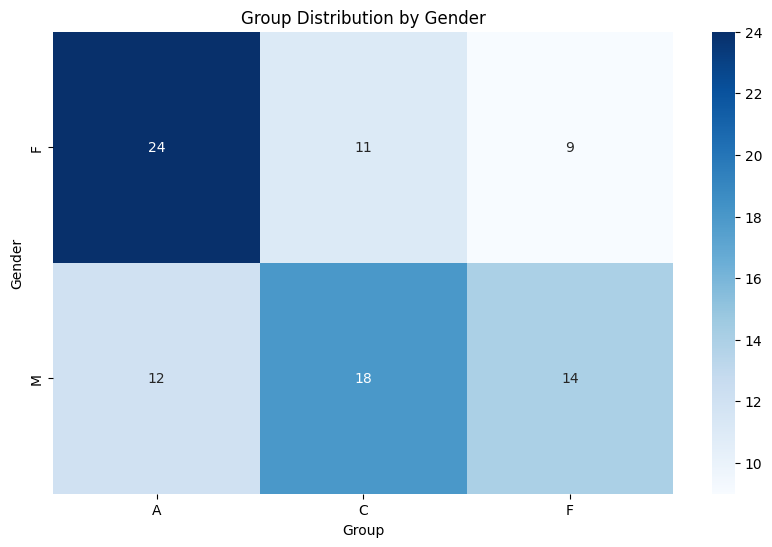

In [78]:
group_counts = participants.groupby(['Gender', 'Group']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(group_counts, annot=True, cmap='Blues', fmt='g')
plt.title('Group Distribution by Gender')
plt.xlabel('Group')
plt.ylabel('Gender')
plt.savefig('data-imgs/group-by-gender-heatmap.png')

In [79]:
group_counts = participants.groupby(['Age', 'Group']).size().unstack(fill_value=0)
group_counts

Group,A,C,F
Age,,,
44,0,0,1
49,1,0,1
53,1,0,1
55,0,0,1
56,1,0,0
57,2,1,1
58,1,0,0
59,1,0,0
60,1,0,1


In [83]:
groupg_counts = participants.groupby(['Age', 'Gender']).size().unstack(fill_value=0)
groupg_counts

Gender,F,M
Age,,
44,0,1
49,0,2
53,2,0
55,0,1
56,1,0
57,3,1
58,1,0
59,1,0
60,1,1


### Group Distribution by Age (Histogram)

/var/folders/1y/ssnsz7sj37qbthfgnh57k7j40000gn/T/ipykernel_64985/3998831427.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = participants.groupby(['Age_Group', 'Group']).size().unstack(fill_value=0)


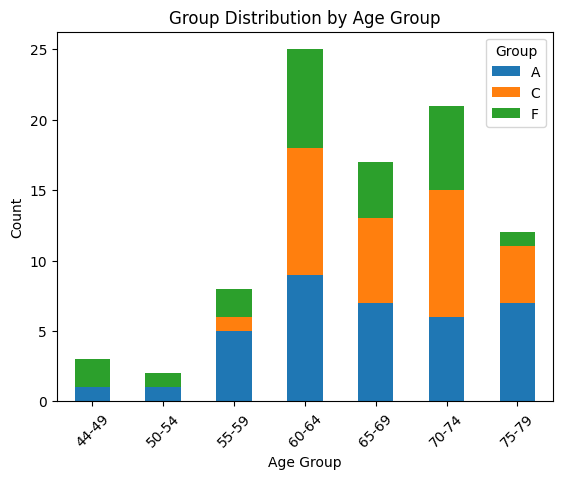

In [80]:
# Define the age bins
age_bins = [43, 49, 54, 59, 64, 69, 74, 79]
age_labels = ['44-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']
participants['Age_Group'] = pd.cut(participants['Age'], bins=age_bins, labels=age_labels)
group_counts = participants.groupby(['Age_Group', 'Group']).size().unstack(fill_value=0)

group_counts.plot(kind='bar', stacked=True)
plt.title('Group Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.savefig('data-imgs/group-by-age-hist.png')

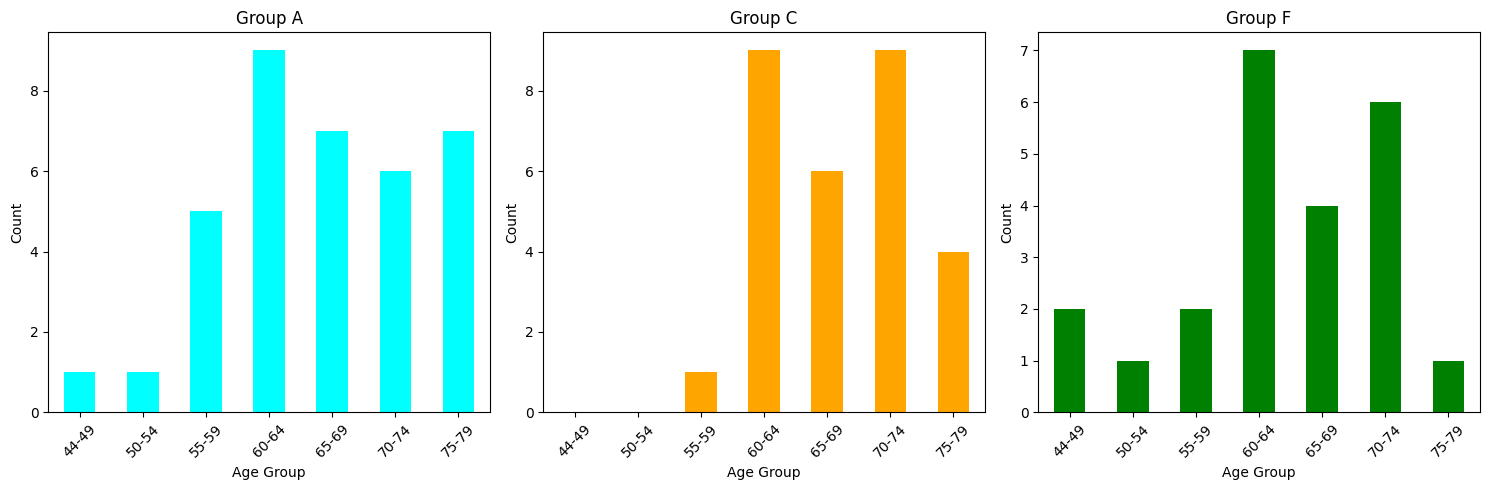

In [81]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram for Group A
group_counts['A'].plot(kind='bar', color='cyan', ax=axs[0])
axs[0].set_title('Group A')
axs[0].set_xlabel('Age Group')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Plot histogram for Group C
group_counts['C'].plot(kind='bar', color='orange', ax=axs[1])
axs[1].set_title('Group C')
axs[1].set_xlabel('Age Group')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

# Plot histogram for Group F
group_counts['F'].plot(kind='bar', color='green', ax=axs[2])
axs[2].set_title('Group F')
axs[2].set_xlabel('Age Group')
axs[2].set_ylabel('Count')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('data-imgs/group-by-age-hist-combined.png')

### Gender by Age

/var/folders/1y/ssnsz7sj37qbthfgnh57k7j40000gn/T/ipykernel_64985/2359016741.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupg_counts = participants.groupby(['Age_Group', 'Gender']).size().unstack(fill_value=0)


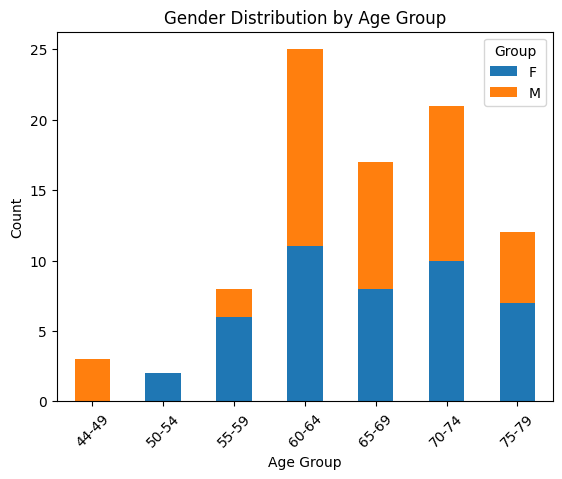

In [84]:
# Define the age bins
age_bins = [43, 49, 54, 59, 64, 69, 74, 79]
age_labels = ['44-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']
participants['Age_Group'] = pd.cut(participants['Age'], bins=age_bins, labels=age_labels)
groupg_counts = participants.groupby(['Age_Group', 'Gender']).size().unstack(fill_value=0)

groupg_counts.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.savefig('data-imgs/gender-by-age-hist.png')

### Gender by Age (Histogram)

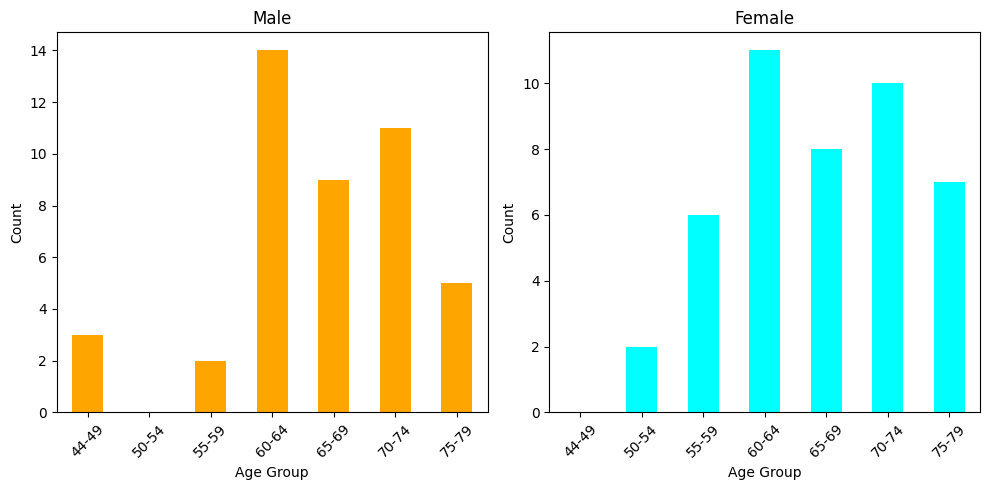

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram for Male
groupg_counts['M'].plot(kind='bar', color='orange', ax=axs[0])
axs[0].set_title('Male')
axs[0].set_xlabel('Age Group')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Plot histogram for Female
groupg_counts['F'].plot(kind='bar', color='cyan', ax=axs[1])
axs[1].set_title('Female')
axs[1].set_xlabel('Age Group')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('data-imgs/gender-by-age-hist-combined.png')

In [ ]:

import os
import json
import random
import time
import copy

import numpy as np
import torch
import torch.nn as nn
import wandb
import optuna

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from torch.utils.data import DataLoader, Subset, Dataset

from eeg_dataset import EEGDataset
from model_optimized_6 import EEGformer

# ─── Reproducibility ────────────────────────────────────────────
SEED = 1
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark     = False

# ─── Configuration ───────────────────────────────────────────────
DATA_DIR    = '/content/drive/MyDrive/2025_Lab_Research/model-data'
LABEL_FILE  = 'labels.json'
DEVICE      = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

MAX_EPOCHS  = 100
BATCH_SIZE  = 32
NUM_WORKERS = 4
PCT_START   = 0.2

class BinaryEEGDataset(Dataset):
    def __init__(self, raw_ds, metas):
        self.raw_ds = raw_ds
        self.metas  = metas
    def __len__(self):
        return len(self.raw_ds)
    def __getitem__(self, idx):
        x, _ = self.raw_ds[idx]
        y = self.metas[idx]['label']
        return x, y

def count_labels(meta_list):
    cnt0 = cnt1 = 0
    for d in meta_list:
        lbl = d['label']
        if isinstance(lbl, str):
            if lbl == 'F': cnt0 += 1
            elif lbl == 'C': cnt1 += 1
        else:
            if lbl == 0: cnt0 += 1
            elif lbl == 1: cnt1 += 1
    return cnt0, cnt1

# ─── Load metadata and preprocess ────────────────────────────────
with open(os.path.join(DATA_DIR, LABEL_FILE), 'r') as f:
    all_meta = json.load(f)

train_meta       = [d for d in all_meta if d['type']=='train']
test_within_meta = [d for d in all_meta if d['type']=='test_within']
test_cross_meta  = [d for d in all_meta if d['type']=='test_cross']

class0, class1 = 'F','C'
label_map = {class0:0, class1:1}

test_within_meta = [d for d in test_within_meta if d['label'] in (class0, class1)]
test_cross_meta  = [d for d in test_cross_meta  if d['label'] in (class0, class1)]

data0 = [d for d in train_meta if d['label']==class0]
data1 = [d for d in train_meta if d['label']==class1]
min_count = min(len(data0), len(data1))
balanced_meta = random.sample(data0, min_count) + random.sample(data1, min_count)
random.shuffle(balanced_meta)
for d in balanced_meta:
    d['label'] = label_map[d['label']]

raw_ds_train  = EEGDataset(DATA_DIR, balanced_meta)
dataset_train = BinaryEEGDataset(raw_ds_train, balanced_meta)

labels_train  = np.array([d['label'] for d in balanced_meta])

# ─── Optuna objective ────────────────────────────────────────────
def objective(trial):
    lr = trial.suggest_float('lr', 1e-5, 1e-3, log=True)
    wd = trial.suggest_float('wd', 1e-6, 1e-3, log=True)

    idx = np.arange(len(dataset_train))
    tr_idx, va_idx = train_test_split(idx, test_size=0.2, stratify=labels_train, random_state=SEED)
    train_loader = DataLoader(Subset(dataset_train, tr_idx), batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
    val_loader   = DataLoader(Subset(dataset_train, va_idx), batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

    input_len = dataset_train[0][0].shape[-1]
    model = EEGformer(in_channels=19, input_length=input_len, kernel_size=10, num_filters=120, num_heads=3, num_blocks=1, num_segments=5, num_classes=2).to(DEVICE)

    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=lr, epochs=MAX_EPOCHS, steps_per_epoch=len(train_loader), pct_start=PCT_START, anneal_strategy='cos', cycle_momentum=False)
    criterion = nn.CrossEntropyLoss()

    best_val_loss = float('inf')
    best_val_acc  = 0.0
    best_state    = None
    es_count = 0
    for epoch in range(1, MAX_EPOCHS+1):
        start_time = time.time()
        model.train()
        for X, y in train_loader:
            X, y = X.to(DEVICE), y.to(DEVICE)
            optimizer.zero_grad()
            logits = model(X)
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()
            scheduler.step()

        model.eval()
        total_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for X, y in full_loader:
                X, y = X.to(DEVICE), y.to(DEVICE)
                logits = model(X)
                loss = criterion(logits, y)
                total_loss += loss.item()
                preds = logits.argmax(1)
                correct += (preds == y).sum().item()
                total += y.size(0)
        acc = correct / total
        avg_loss = total_loss / len(full_loader)
        end_time = time.time()
        print(f"Epoch {epoch:03d} | train_loss={avg_loss:.4f} acc={acc:.4f} | val_loss=N/A acc=N/A | prec=N/A rec=N/A spec=N/A f1=N/A | time={end_time - start_time:.1f}s")

        model.eval()
        vloss = 0.0
        correct, total = 0, 0
        with torch.no_grad():
            for X, y in val_loader:
                X, y = X.to(DEVICE), y.to(DEVICE)
                logits = model(X)
                loss = criterion(logits, y)
                vloss += loss.item()
                preds = logits.argmax(1)
                correct += (preds == y).sum().item()
                total += y.size(0)

        val_loss = vloss / len(val_loader)
        val_acc = correct / total

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_val_acc  = val_acc
            best_state    = copy.deepcopy(model.state_dict())
            trial.set_user_attr('best_epoch', epoch)
            es_count = 0
        else:
            es_count += 1
            if es_count >= 15:
                break

    return best_val_loss, best_val_acc, best_state

# ─── Test evaluation ─────────────────────────────────────────────
def evaluate(model, metas):
    metas_copy = copy.deepcopy(metas)
    for d in metas_copy:
        if isinstance(d['label'], str):
            d['label'] = label_map[d['label']]

    ds = BinaryEEGDataset(EEGDataset(DATA_DIR, metas_copy), metas_copy)
    loader = DataLoader(ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

    model.eval()
    vloss = 0.0
    correct = 0
    all_preds, all_labels = [], []
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(DEVICE), y.to(DEVICE)
            logits = model(X)
            vloss += criterion(logits, y).item()
            preds = logits.argmax(1)
            correct += (preds == y).sum().item()
            all_preds.append(preds.cpu().numpy())
            all_labels.append(y.cpu().numpy())

    preds = np.concatenate(all_preds)
    labs  = np.concatenate(all_labels)
    tn, fp, fn, tp = confusion_matrix(labs, preds, labels=[0,1]).ravel()
    return {
        'loss': vloss / len(loader),
        'acc':  correct / len(ds),
        'sensitivity': recall_score(labs, preds, zero_division=0),
        'specificity': tn / (tn + fp) if (tn + fp) > 0 else 0.0,
        'f1':   f1_score(labs, preds, zero_division=0)
    }

# ─── Main ─────────────────────────────────────────────────────────
if __name__ == "__main__":
    study = optuna.create_study(directions=['minimize', 'maximize'], study_name="eeg_final_retrain")
    def wrapped(trial):
        loss, acc, state = objective(trial)
        return loss, acc
    study.optimize(wrapped, n_trials=10)

    best = max(study.best_trials, key=lambda t: t.values[1])
    lr = best.params['lr']
    wd = best.params['wd']

    print(f"=== Retraining best trial (Trial {best.number}) on full train set ===")
    full_loader = DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

    model = EEGformer(in_channels=19, input_length=dataset_train[0][0].shape[-1], kernel_size=10, num_filters=120, num_heads=3, num_blocks=1, num_segments=5, num_classes=2).to(DEVICE)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=lr, epochs=MAX_EPOCHS, steps_per_epoch=len(full_loader), pct_start=PCT_START, anneal_strategy='cos', cycle_momentum=False)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(1, MAX_EPOCHS+1):
        start_time = time.time()
        model.train()
        for X, y in full_loader:
            X, y = X.to(DEVICE), y.to(DEVICE)
            optimizer.zero_grad()
            logits = model(X)
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()
            scheduler.step()

    print("=== Final Evaluation on Test Sets ===")
    for name, metas in [('test_within', test_within_meta), ('test_cross', test_cross_meta)]:
        res = evaluate(model, metas)
        n0, n1 = count_labels(metas)
        print(f"-- {name} -- total={len(metas)}  F(TD)={n0}, C(N)={n1}")
        print(f" Accuracy={res['acc']:.4f} Sensitivity={res['sensitivity']:.4f} Specificity={res['specificity']:.4f} F1={res['f1']:.4f}\n")
